In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
from cycler import cycler

In [3]:
# plt.rcdefaults()
# # axes:
# rcParams['axes.grid'] = True
# rcParams['axes.grid.axis'] = 'both'
# rcParams['axes.axisbelow'] = True
# # rcParams['axes.prop_cycle'] = cycler('color', ['olive', 'darkorchid', 'navy', 'teal', 'firebrick', 'darkgoldenrod', 'seagreen', 'sienna', 'olivedrab', 'rebeccapurple'])
# # figure:
# rcParams['figure.autolayout'] = True
# rcParams['figure.dpi'] = 100

# # fontsizes
# rcParams['xtick.labelsize'] = 12
# rcParams['ytick.labelsize'] = 12
# rcParams['legend.fontsize'] = 12
# rcParams['legend.title_fontsize'] = 12
# rcParams['axes.labelsize'] = 16

# # legend
# # rcParams['legend.framealpha'] = 1
# rcParams['legend.fancybox'] = False
# rcParams['legend.edgecolor'] = 'gray'


# # save
# rcParams['savefig.bbox'] = 'tight'

In [4]:
def MSD(x,y):
    suma=0
    for n in range(len(x)):
        suma+=(x[n]-x[0])**2+(y[n]-y[0])**2
    MSD = suma/len(x)
    return suma/len(x)

def lineal(x, a, b):
    return a*x + b

def cuadratica(x, a, b, c):
    return a*x**2 + b*x + c

def viscosidad(m, R, T, err_m, err_R, err_T):
    neff = 2*1.38*1e-23*T/(3*np.pi*R*m)
    err_neff = 0 # propagación de errores
    return neff, err_neff

def pixel_a_micron(pix): # toma píxeles devuelve micrones
    escala = 10/106.04
    micro = pix*escala
    return micro

def celsius_a_k(g):
    return g+273.15

In [5]:
datos = np.genfromtxt('Mediciones/muestra agua mq browniano.txt', delimiter=',')
print(np.shape(datos))

dist_px = 4.534176E2 - 
dist_si = 1.865824E2 - 1.865000E2
print(dist_px/dist_si)

(255, 13)
-1.0


In [6]:
t = datos[2:].T[0] # segundos
lista_pos=[]

for i in range(1, len(datos[0]), 2):
    xy = []
    for j in datos:
        if np.isnan(j[i]) == False: 
            xy.append([j[i], j[i+1]])
    xy = np.array(xy)
    lista_pos.append(xy)

lista_bien  = []

for part in lista_pos:
    np.stack(part)
    lista_bien.append(pixel_a_micron(part.T)*1e-6)



In [7]:
# para entender el indexeado
# print(f'lista_pos: {type(lista_pos)}, {len(lista_pos)}\npart: {type(lista_pos[0])}, {len(lista_pos[0])}\ncoord: {type(lista_pos[0][0])}, {len(lista_pos[0][0])}')
# print(f'shape part lista_pos:{np.shape(lista_pos[0])}')

print(f'lista_bien: {type(lista_bien)}, {len(lista_bien)}\npart: {type(lista_bien[0])}, {len(lista_bien[0])}\ncoord: {type(lista_bien[0][0])}, {len(lista_bien[0][0])}')
print(f'shape part lista_bien:{np.shape(lista_bien[0])}')

# hay que sí o sí trasponer part

lista_bien: <class 'list'>, 6
part: <class 'numpy.ndarray'>, 2
coord: <class 'numpy.ndarray'>, 253
shape part lista_bien:(2, 253)


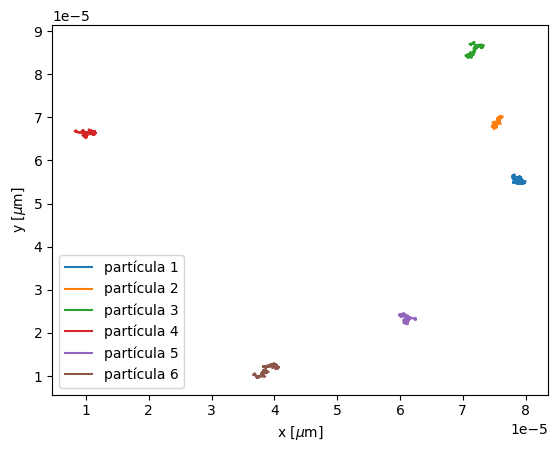

In [8]:
err_x = 2.25*1e-6
err_y = 2.25*1e-6

fig, ax = plt.subplots()
for n, part in enumerate(lista_bien):
    x = part[0]
    y = part[1]
    ax.plot(x, y, label=f'partícula {n+1}')
ax.set_xlabel(r'x [$\mu$m]')
ax.set_ylabel(r'y [$\mu$m]')
ax.legend()

MSD: cálculo y ajuste
IDEAS: comparar el msd promedio de las mismas artículas en distintos medios y de distintas partículas en el mismo medio, sabiendo que la pendiente tiene que ver con el coef de viscosidad

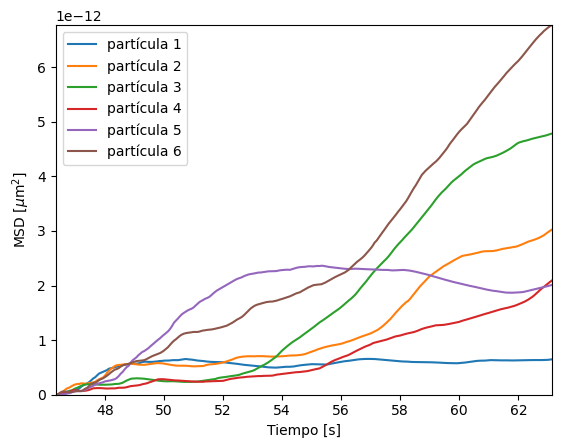

In [9]:
fig, ax = plt.subplots()

lista_MSD = []
for n, part in enumerate(lista_bien):
    x = part[0]
    y = part[1]
    part_MSD = []
    for i in range(len(x)):    
        msd = MSD(x[:i+1], y[:i+1])
        part_MSD.append(msd)
    lista_MSD.append(part_MSD)

for n, disp in enumerate(lista_MSD):
    t1 = t[:len(disp)] # esto es porque hay un frame menos de la prtícula 8, asi que para plotear tengo que acortar el tiempo a la longitud de cada set de datos 
    ax.plot(t1, disp, label=f'partícula {n+1}')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'MSD [$\mu$m$^2]$')
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.legend()


Ajuste lineal m*x + b1
m = 1.886596531911214e-13 +- 2.0135295350984935e-15
b1 = -8.908701392700738e-12 +- 1.1056473093590395e-13
R^2 = 0.9723112553384626

Ajuste cuadrático a*x^2 + b2*x + c
a = 6.33257231900862e-15 +- 2.3522047670162077e-16
b2 = -5.040775729111301e-13 +- 2.5751621995676148e-14
c = 9.887478750627237e-12 +- 7.00419406574707e-13
R^2 = 0.9929199077377504


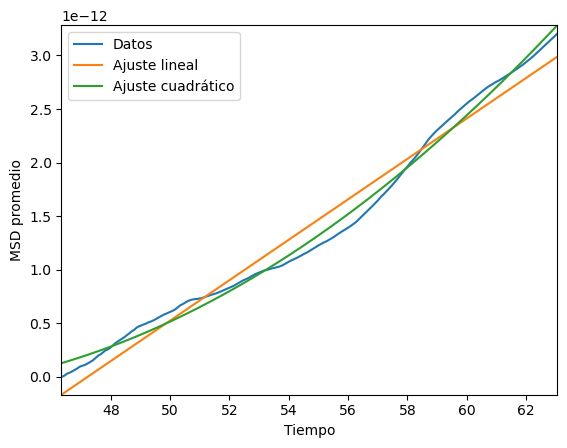

In [10]:
MSD_promedio = []
for n in range(len(lista_MSD[0])-1): # como hay un frame menos en la partícula 8 promedio hasta ese 
    val = 0
    for disp in lista_MSD:
        val += disp[n]
    MSD_promedio.append(val/len(lista_MSD))


# esto para cuando las mediciones son todas de igual longitud:

# val = 0
# for disp in lista_MSD:
#         val += disp[-1]
# MSD_promedio.append(val/len(lista_MSD))

# Ajuste lineal
popt_lin, pcov_lin = curve_fit(lineal, t[:len(MSD_promedio)], MSD_promedio, p0=[50, 0])
m, b1 = popt_lin
perr_lin = np.sqrt(np.diag(pcov_lin))
err_m, err_b1 = perr_lin

# R^2 lineal:
res_lin = MSD_promedio- lineal(t[:len(MSD_promedio)], *popt_lin)
ss_res_lin = np.sum(res_lin**2)
ss_tot_lin = np.sum((MSD_promedio-np.mean(MSD_promedio))**2)
r_cuadrado_lin = 1 - (ss_res_lin / ss_tot_lin)

print(f'Ajuste lineal m*x + b1\nm = {m} +- {err_m}\nb1 = {b1} +- {err_b1}\nR^2 = {r_cuadrado_lin}\n')

# Ajuste cuadrático
popt_cuad, pcov_cuad = curve_fit(cuadratica, t[:len(MSD_promedio)], MSD_promedio, p0=[0, 50, 0])
a, b2, c = popt_cuad
perr_cuad = np.sqrt(np.diag(pcov_cuad))
err_a, err_b2, err_c = perr_cuad

# R^2 cuadrático:
res_cuad = MSD_promedio- cuadratica(t[:len(MSD_promedio)], *popt_cuad)
ss_res_cuad = np.sum(res_cuad**2)
ss_tot_cuad = np.sum((MSD_promedio-np.mean(MSD_promedio))**2)
r_cuadrado_cuad = 1 - (ss_res_cuad / ss_tot_cuad)

print(f'Ajuste cuadrático a*x^2 + b2*x + c\na = {a} +- {err_a}\nb2 = {b2} +- {err_b2}\nc = {c} +- {err_c}\nR^2 = {r_cuadrado_cuad}')

x = np.linspace(t[0], t[:len(MSD_promedio)][-1], 1000)
y_fit_lin = lineal(x, m, b1)
y_fit_cuad = cuadratica(x, a, b2, c)

fig, ax = plt.subplots()
ax.plot(t[:len(MSD_promedio)], MSD_promedio, label='Datos')
ax.plot(x, y_fit_lin, label='Ajuste lineal')
ax.plot(x, y_fit_cuad, label='Ajuste cuadrático')
ax.set_xlabel('Tiempo')
ax.set_ylabel('MSD promedio')
ax.set_xmargin(0)
ax.set_ymargin(0)
ax.legend()

Coef de viscosidad y cálculo de la fuerza máxima:

In [11]:
radio_px = 50
radio = pixel_a_micron(50)*1e-6 # el 1e-6 lo pasa a metros para tener el neff en unidades razonables
print(radio)
T_celsius = 25.5
T = celsius_a_k(T_celsius)
neff, nerr = viscosidad(m, radio, T, 0, 0, 0)

Fuerza_v = 6*np.pi*neff*radio*8*1e-6
print(Fuerza_v)

4.7152018106374945e-06
6.990569407354693e-13
